In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd
import itertools

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# <font color='blue'>Review - Scorecard Development Process

## **Scorecard Development Process**
---

**1. Explore data.**
  - Simple statistics such as distributions of values, mean/median, etc.
  - Checking data integrity.

**2. Handle missing values and outliers.**
  - Most financial industry data contains missing values, or values that do not make sense for a particular characteristic

**3. Check correlation.**

**4. Initial characteristic analysis.**
  - To assess the strength of each characteristic individually as a predictor of performance.

**5. Statistical Measures.**
  - Weight of Evidence (WoE) — measures the strength of each attribute.
  - Information Value (IV) — measures the total strength of the characteristic.

**6. Check logical trend.**
  - Attribute strengths must also be in a logical order, and make operational sense.

**7. Check business/operational considerations.**
  - The consideration is business or operational relevance. e.g. postal codes.

**8. Design scorecards.**
  - Preliminary scorecard
  - Reject inference —
To make educated guesses about how rejected applicants would have performed if accepted.
  - Final scorecard production

**9. Choose a scorecard** — using a combination of statistical and business measures.
  - For example: misclassification, scorecard strength (KS, Chi-square, AIC, AUC), etc.



## **1. Load Data**
---

The sample we will use in this example is a fictive dataset from [here](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data).

The sample consist of some demographic and financial information.

The data give status for each of loan_id

- `Loan_Status`
  - `Y` for approved loan.
  - `N` for not approved loan.

The potential characteristics for predicting the approval are

1. `gender`  = 'Male' or 'Female', categorical data
2. `married` = marital status, categorical data
3. `dependents` = number of dependents, numerical data
4. `education` = 'graduate' or 'not graduate', categorical data
5. `self_employed` = employment category 'No' or 'Yes', categorical data
6. `applicant_income` = total amount of applicant income, numerical data
7. `coapplicant_income` = total amount of applicant income, numerical data
8. `loan_amount` = proposed loan amount, numerical data
9. `loan_amount_term` = proposed loan amount, numerical data
10. `credit_history` = '1' for previous credit '0' for no previous credit, categorical data
11. `property_area` = property location consist of 'Urban' or 'Rural', numerical data

In [2]:
# Import dataset from csv file
data = pd.read_csv('loan_sanction_train.csv')

# Table check
data.head().T

,0,1,2,3,4
loan_id,LP001002,LP001003,LP001005,LP001006,LP001008
gender,Male,Male,Male,Male,Male
married,No,Yes,Yes,Yes,No
dependents,0,1,0,0,0
education,Graduate,Graduate,Graduate,Not Graduate,Graduate
self_employed,No,No,Yes,No,No
applicant_income,5849,4583,3000,2583,6000
coapplicant_income,0.0,1508.0,0.0,2358.0,0.0
loan_amount,NaN,128.0,66.0,120.0,141.0
loan_amount_term,360.0,360.0,360.0,360.0,360.0


In [3]:
data.head(20)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Check the data shape
data.shape

(614, 13)

Our sample contains 13 variables from 614 credit records.
- 1 response variable, `loan_status`,
- and 12 potential characteristics/predictors.

In [5]:
# Checking null and na
data.isna().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [6]:
data.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [9]:
data.shape

(480, 13)

## **2. Exploratory Data Analysis**
---

In [10]:
data.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [11]:
# Assuming 'df' is your DataFrame
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()

In [12]:
numerical_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']

In [13]:
categorical_columns=['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'loan_status','credit_history']

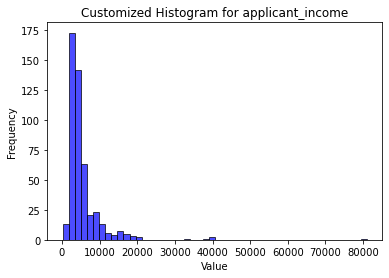

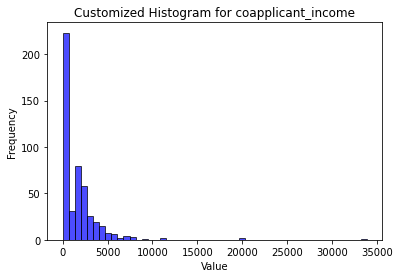

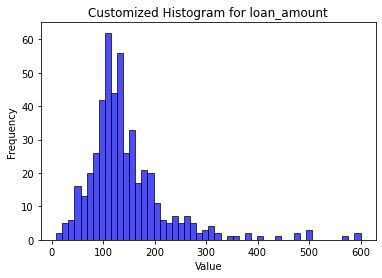

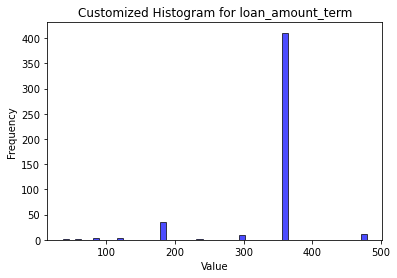

In [14]:
# histogram for numerical category
for column in numerical_columns:
    plt.hist(data[column], bins=50, edgecolor='black', alpha=0.7, color='blue')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Customized Histogram for {column}')
    plt.show()

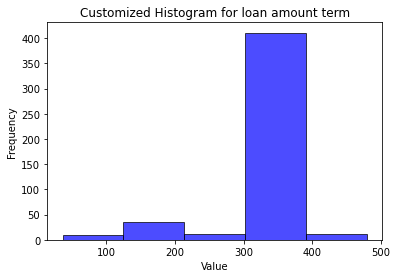

In [15]:
plt.hist(data["loan_amount_term"], bins=5, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Customized Histogram for loan amount term')
plt.show()

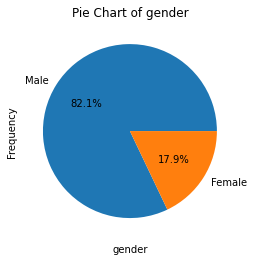

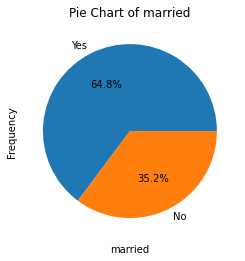

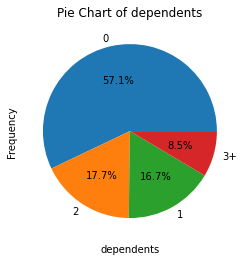

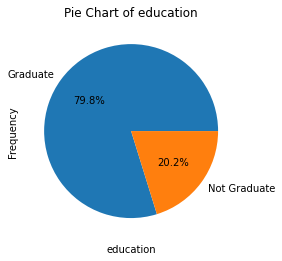

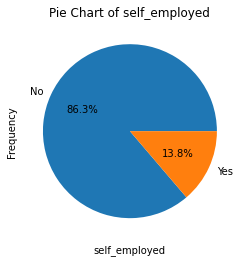

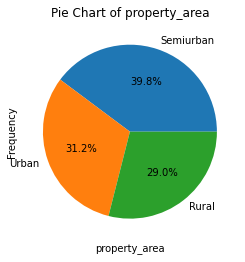

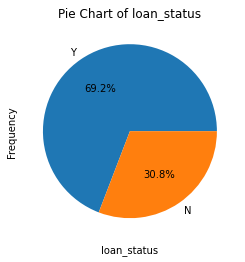

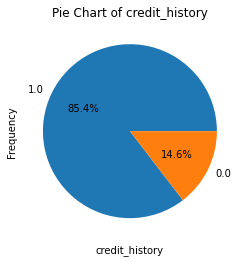

In [16]:
for column in categorical_columns:
    # Count the frequency of each category
    category_counts = data[column].value_counts()
    
    # Create the bar chart
    category_counts.plot(kind='pie', autopct='%1.1f%%')
    
    # Add labels and a title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Pie Chart of {column}')
    
    # Display the chart
    plt.show()

## **3. Check Correlation**
---

In [17]:
corr_data = data.copy()
for col in categorical_columns:
    if col not in corr_data.columns:
        print(f"Column '{col}' not found in corr_data.")

In [18]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False).fit(corr_data.loc[:, categorical_columns])
column_names = enc.get_feature_names(categorical_columns)
column_names
encoded_variables = pd.DataFrame(enc.transform(corr_data.loc[:, categorical_columns]), columns=column_names)
corr_data = corr_data.drop(categorical_columns, 1)
corr_data.reset_index(drop=True, inplace=True)
ohe_data = pd.concat([corr_data, encoded_variables], axis=1)
ohe_data.reset_index(drop=True, inplace=True)

C:\Users\Adinda Gita\AppData\Local\Temp\ipykernel_6216\172633562.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  corr_data = corr_data.drop(categorical_columns, 1)


In [19]:
# Calculate the correlation matrix
corr_matrix = ohe_data.corr()# Set the figure size

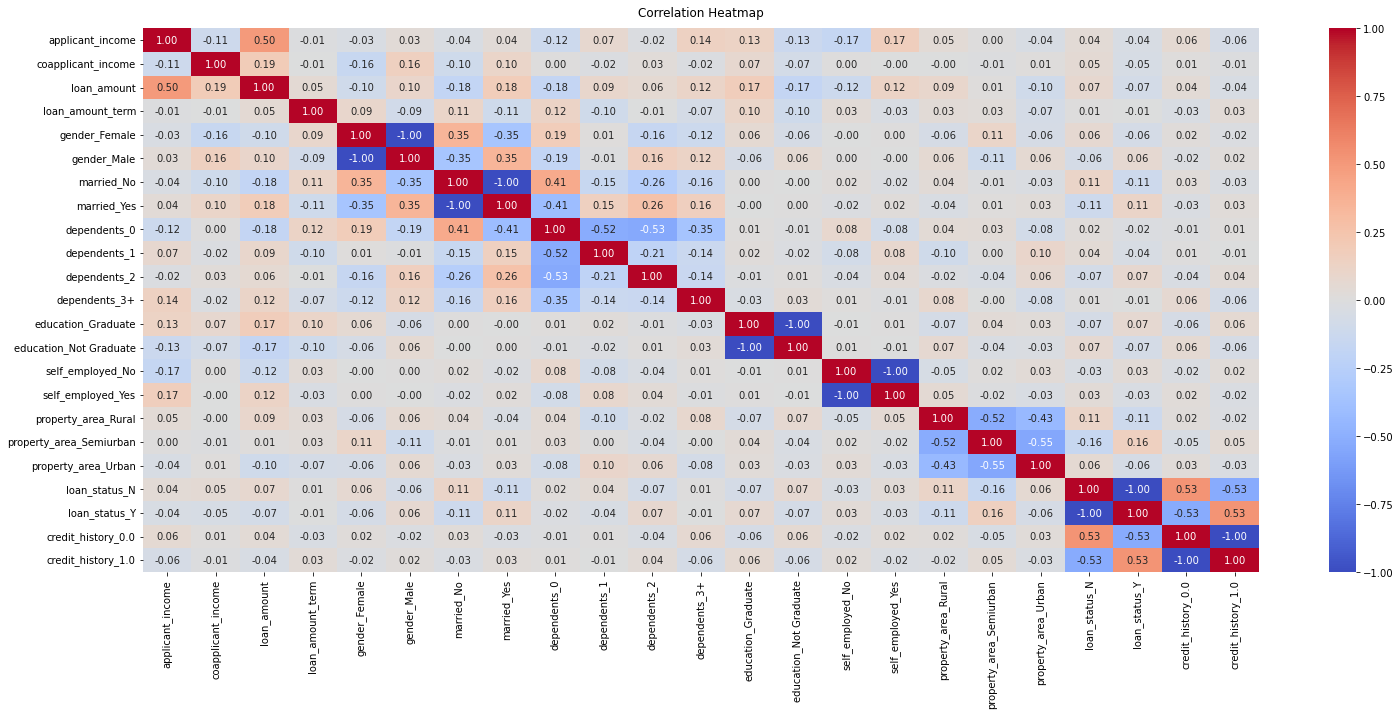

In [20]:
# Set the figure size
plt.figure(figsize=(25, 10))

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Set the title and adjust the padding
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Show the heatmap
plt.show()

### **2. WoE and IV**
---  
To assess the strength of each characteristic individually as a predictor of the credit performance.

- Weight of Evidence (WoE) — measures the strength of each attribute.

$$
\begin{align*}
W_i &= \ln ( \% \text{Good} / \% \text{Bad} ) \\
W_i &= \ln \left ( \left ( \frac{N_i}{\sum N} \right ) / \left ( \frac{P_i}{\sum P} \right )\right ) \\
\end{align*}
$$

- Information Value (IV) — measures the total strength of the characteristic.

$$
\begin{align*}
IV &= \sum_{i=1}^{n} ( \% \text{Good} - \% \text{Bad} ) \times W_i \\
IV &= \sum_{i=1}^{n}\left [ \left ( \frac{N_i}{\sum N} - \frac{P_i}{\sum P} \right ) \times W_i \right ] \\
\end{align*}
$$

In [21]:
ct_credit_history = pd.crosstab(data['credit_history'],
                                  data['loan_status'],
                                  margins = True)
ct_credit_history

loan_status,N,Y,All
credit_history,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


In [22]:
# Calculate % Good
ct_credit_history['p_good'] = ct_credit_history['N']/ct_credit_history['N']['All']

# Calculate % Bad
ct_credit_history['p_bad'] = ct_credit_history['Y']/ct_credit_history['Y']['All']

# Calculate the WOE
ct_credit_history['WOE'] = np.log(ct_credit_history['p_good']/ct_credit_history['p_bad'])

# Calculate the contribution value for IV
ct_credit_history['contribution'] = (ct_credit_history['p_good']-ct_credit_history['p_bad'])*ct_credit_history['WOE']

In [23]:
# Display the result
ct_credit_history

loan_status,N,Y,All,p_good,p_bad,WOE,contribution
credit_history,,,,,,,
0.0,63,7,70,0.425676,0.021084,3.005147,1.215857
1.0,85,325,410,0.574324,0.978916,-0.533251,0.215749
All,148,332,480,1.000000,1.000000,0.000000,0.000000


In [24]:
ct_property_area = pd.crosstab(data['property_area'],
                                  data['loan_status'],
                                  margins = True)
ct_property_area

loan_status,N,Y,All
property_area,,,
Rural,54,85,139
Semiurban,42,149,191
Urban,52,98,150
All,148,332,480


In [25]:
# Calculate % Good
ct_property_area['p_good'] = ct_property_area['N']/ct_property_area['N']['All']

# Calculate % Bad
ct_property_area['p_bad'] = ct_property_area['Y']/ct_property_area['Y']['All']

# Calculate the WOE
ct_property_area['WOE'] = np.log(ct_property_area['p_good']/ct_property_area['p_bad'])

# Calculate the contribution value for IV
ct_property_area['contribution'] = (ct_property_area['p_good']-ct_property_area['p_bad'])*ct_property_area['WOE']

In [26]:
# Display the result
ct_property_area

loan_status,N,Y,All,p_good,p_bad,WOE,contribution
property_area,,,,,,,
Rural,54,85,139,0.364865,0.256024,0.354255,0.038557
Semiurban,42,149,191,0.283784,0.448795,-0.458354,0.075634
Urban,52,98,150,0.351351,0.295181,0.174199,0.009785
All,148,332,480,1.000000,1.000000,0.000000,0.000000


In [27]:
ct_married = pd.crosstab(data['married'],
                                  data['loan_status'],
                                  margins = True)
ct_married

loan_status,N,Y,All
married,,,
No,64,105,169
Yes,84,227,311
All,148,332,480


In [28]:
# Calculate % Good
ct_married['p_good'] = ct_married['N']/ct_married['N']['All']

# Calculate % Bad
ct_married['p_bad'] = ct_married['Y']/ct_married['Y']['All']

# Calculate the WOE
ct_married['WOE'] = np.log(ct_married['p_good']/ct_married['p_bad'])

# Calculate the contribution value for IV
ct_married['contribution'] = (ct_married['p_good']-ct_married['p_bad'])*ct_married['WOE']

In [29]:
ct_married

loan_status,N,Y,All,p_good,p_bad,WOE,contribution
married,,,,,,,
No,64,105,169,0.432432,0.316265,0.312845,0.036342
Yes,84,227,311,0.567568,0.683735,-0.186211,0.021632
All,148,332,480,1.000000,1.000000,0.000000,0.000000


In [30]:
data_binned = data.copy()

# Create a new column containing the binned predictor
data_binned["loan_amount_bin"] = pd.qcut(data_binned["loan_amount"],q = 4)

In [31]:
ct_loan_amount = pd.crosstab(data_binned['loan_amount_bin'],
                                  data_binned['loan_status'],
                                  margins = True)
ct_loan_amount

loan_status,N,Y,All
loan_amount_bin,,,
"(8.999, 100.0]",38,86,124
"(100.0, 128.0]",37,84,121
"(128.0, 170.0]",30,86,116
"(170.0, 600.0]",43,76,119
All,148,332,480


In [32]:
# Calculate % Good
ct_loan_amount['p_good'] = ct_loan_amount['Y']/ct_loan_amount['All']

# Calculate % Bad
ct_loan_amount['p_bad'] = ct_loan_amount['N']/ct_loan_amount['All']

# Calculate the WOE
ct_loan_amount['WOE'] = np.log(ct_loan_amount['p_good']/ct_loan_amount['p_bad'])

# Calculate the contribution value for IV
ct_loan_amount['contribution'] = (ct_loan_amount['p_good']-ct_loan_amount['p_bad'])*ct_loan_amount['WOE']

In [33]:
ct_loan_amount

loan_status,N,Y,All,p_good,p_bad,WOE,contribution
loan_amount_bin,,,,,,,
"(8.999, 100.0]",38,86,124,0.693548,0.306452,0.816761,0.316166
"(100.0, 128.0]",37,84,121,0.694215,0.305785,0.819899,0.318473
"(128.0, 170.0]",30,86,116,0.741379,0.258621,1.053150,0.508417
"(170.0, 600.0]",43,76,119,0.638655,0.361345,0.569533,0.157938
All,148,332,480,0.691667,0.308333,0.807923,0.309704


In [34]:
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)


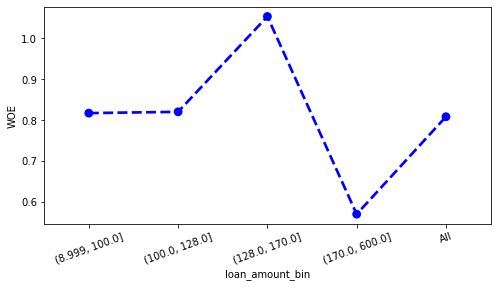

In [35]:
# Plot the WOE of  person_age
plot_WOE(ct_loan_amount)

<b>credit_history_WOE</b>

In [36]:
# Define the two conditions with tolerance
epsilon = 1e-6  # A small epsilon value to account for floating-point precision

# Function to set values based on conditions
def set_credit_history_WOE(row):
    if abs(row['credit_history'] - 0.0) < epsilon:
        return -0.533251
    elif abs(row['credit_history'] - 1.0) < epsilon:
        return 3.005147
    else:
        return row['credit_history_WOE']

# Apply the function to set values in the 'credit_history_WOE' column
data_binned['credit_history_WOE'] = data_binned.apply(set_credit_history_WOE, axis=1)


<b>married_status_WOE</b>

In [37]:
# Function to set values based on conditions
def set_married_status_WOE(row):
    if row['married'] == 'Yes':
        return -0.186211
    elif row['married'] == 'No':
        return 0.312845
    else:
        return row['married_status_WOE']


# Apply the function to set values in the 'married_status_WOE' column
data_binned['married_status_WOE'] = data_binned.apply(set_married_status_WOE, axis=1)

<b>property_area_WOE</b>

In [42]:
# Function to set values based on conditions
def set_property_area_WOE(row):
    if row['property_area'] == 'Rural':
        return 0.354255
    elif row['property_area'] == 'Semiurban':
        return -0.458354
    elif row['property_area'] == 'Urban':
        return 0.174199
    else:
        return row['property_area_WOE']

# Apply the function to set values in the 'married_status_WOE' column
data_binned['property_area_WOE'] = data_binned.apply(set_property_area_WOE, axis=1)

<b>loan_amount_WOE</b>

In [39]:
# Define the each attribute
loan_amount_1 = (data_binned['loan_amount'] >= 8.999) & (data_binned['loan_amount'] < 100)
loan_amount_2 = (data_binned['loan_amount'] >= 100) & (data_binned['loan_amount'] < 128)
loan_amount_3 = (data_binned['loan_amount'] >= 128) & (data_binned['loan_amount'] < 170)

# Replace the input with WOE
data_binned['loan_amount_WOE'] = np.where(loan_amount_1, 0.816761,
                                      np.where(loan_amount_2, 0.819899,
                                      np.where(loan_amount_3, 1.053150,0.56953)))

In [40]:
#Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
data_binned['loan_status'] = encoder.fit_transform(data_binned['loan_status'])

In [41]:
X = data_binned[['married_status_WOE',
                'credit_history_WOE',
                'property_area_WOE',
                'loan_amount_WOE']]
                      
y = data_binned['loan_status']

predictor_set = ['married_status_WOE',
                       'credit_history_WOE',
                       'property_area_WOE',
                       'loan_amount_WOE']

### **2. Logistic Regression Modeling**
---

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
def get_scores(X, y, predictor_set):
    # Define the estimator
    model = LogisticRegression(penalty='none', class_weight='balanced')

    # Perform 5-fold CV to get CV scores (average log likelihood)
    scores = cross_validate(estimator=model, X=X[list(predictor_set)], y=y, scoring='neg_log_loss', cv=5)

    # Calculate log likelihood from the test set
    log_likelihood = np.mean(scores['test_score'] * len(X))

    # Calculate AIC from the test set
    AIC = -2 * (log_likelihood - (len(X.columns) + 1))
    AIC = round(AIC, 2)

    return {'Predictors': list(predictor_set), 'AIC': AIC}

In [102]:
# Assuming you have X_train and y_train dataframes or arrays
result = get_scores(X_train, y_train, predictor_set)
print(result)

{'Predictors': ['married_status_WOE', 'credit_history_WOE', 'property_area_WOE', 'loan_amount_WOE'], 'AIC': 345.21}


In [103]:
import pandas as pd
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np

def get_scores(X, y, predictor_set):
    # Define the estimator
    model = LogisticRegression(penalty='none', class_weight='balanced')

    # Perform 5-fold CV to get CV scores (average log likelihood)
    scores = cross_validate(estimator=model, X=X[list(predictor_set)], y=y, scoring='neg_log_loss', cv=5)

    # Calculate log likelihood from the test set
    log_likelihood = np.mean(scores['test_score'] * len(X))

    # Calculate AIC from the test set
    AIC = -2 * (log_likelihood - (len(X.columns) + 1))
    AIC = round(AIC, 2)

    return {'Predictors': list(predictor_set), 'AIC': AIC}

def best_subset(k, X, y):
    """
    Function to choose the best model of each k predictors included

    Parameters
    ----------
    k : int, in range number of all predictors (p)
      The number of predictors included in the model

    X : DataFrame
      The feature data (predictors)

    y : Series or array
      The target variable

    Returns
    -------
    best_model : DataFrame
      The best model with the smallest AIC in list of possible models

    """
    # Create a list of result from function get_scores(predictor_set)
    results = []

    # Fit model and calculate AIC from each combination of predictors
    for combination in itertools.combinations(X.columns, k):
        results.append(get_scores(X, y, combination))

    # Tabulate list of results in dataframe
    models = pd.DataFrame(results)

    # Choose the best model with the smallest AIC
    best_model = models.loc[models['AIC'].argmin()]

    # Return the best model
    return best_model


In [104]:
# Assuming you have X_train and y_train dataframes or arrays
best_subset_models = pd.DataFrame(columns=['Predictors', 'AIC'])

# Get the best model k for k=1,...,p
for k in range(1, X_train.shape[1] + 1):
    best_subset_models.loc[k] = best_subset(k, X_train, y_train)

best_subset_models

,Predictors,AIC
1,[credit_history_WOE],352.63
2,"[credit_history_WOE, property_area_WOE]",348.13
3,"[credit_history_WOE, property_area_WOE, loan_a...",344.83
4,"[married_status_WOE, credit_history_WOE, prope...",345.21


In [105]:
# Define the model
model = LogisticRegression(penalty = 'none',
                           class_weight = 'balanced')

# Model fitting
model.fit(X = X_train,
          y = y_train)

LogisticRegression(class_weight='balanced', penalty='none')

Text(0.5, 1.0, 'Confusion Matrix')

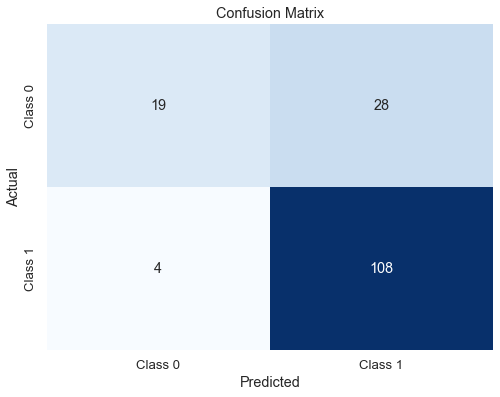

In [109]:
log_reg_pred = model.predict(X_test)
log_reg = confusion_matrix(y_test, log_reg_pred)
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')